In [1]:
# execute this for the 1st time
#!pip install -r example-requirements.txt 

# download file 
!wget http://helon.usuarios.rdc.puc-rio.br/data/data3SS2009.mat # linux

# and place in folder data/

--2022-05-16 12:38:21--  http://helon.usuarios.rdc.puc-rio.br/data/data3SS2009.mat
Resolving helon.usuarios.rdc.puc-rio.br (helon.usuarios.rdc.puc-rio.br)... 139.82.34.10
Connecting to helon.usuarios.rdc.puc-rio.br (helon.usuarios.rdc.puc-rio.br)|139.82.34.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 267634147 (255M)
Saving to: ‘data3SS2009.mat’

data3SS2009.mat     100%[===================>] 255.24M  5.94MB/s    in 60s     

2022-05-16 12:39:23 (4.25 MB/s) - ‘data3SS2009.mat’ saved [267634147/267634147]



In [2]:
! pip install statsmodels==0.13.2

     |████████████████████████████████| 9.8 MB 21.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
import numpy as np
import matplotlib 
import scipy
import sklearn
import statsmodels
# import tsfresh
import seaborn
import pydot

from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.ar_model import AutoReg
from sklearn.linear_model import LogisticRegression 

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import scipy.io as sio
import numpy as np
from os import getcwd
from os.path import join 
import matplotlib.pyplot as plt

In [6]:

fname = join(getcwd(),'data3SS2009.mat')

mat_contents = sio.loadmat(fname)

dataset = mat_contents['dataset']

N, Chno, Nc = dataset.shape 
# N: number of samples
# Chno: number of channels
# Nc: number of cases

y = mat_contents['labels'].reshape(Nc)

y

np.where(y==10)

(array([450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462,
        463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475,
        476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488,
        489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499]),)

Dividindo os resultados em duas classes

In [7]:
y_bin = np.zeros((1,850))
y_bin[:,450:] = y_bin[:,450:] + 1
y_bin

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

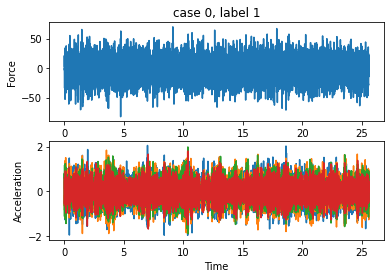

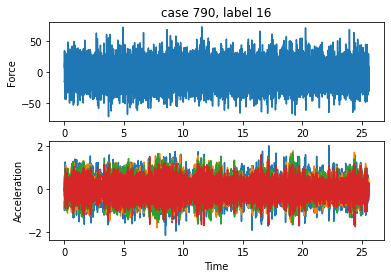

In [8]:
Ch1 = dataset[:,0,:] # célula de carga: força do shaker
Ch2 = dataset[:,1,:] # acelerômetro: base
Ch3 = dataset[:,2,:] # acelerômetro: 1o andar
Ch4 = dataset[:,3,:] # acelerômetro: 2o andar
Ch5 = dataset[:,4,:] # acelerômetro: 3o andar

Ts = 3.125 * 1e-3 # sampling time
time = (np.linspace(1,N,N) - 1) * Ts

for case in np.array([0,790]):
    plt.figure(case)
    plt.subplot(211)
    plt.title('case %d, label %d' % (case, y[case]))
    plt.plot(time,Ch1[:,case])
    plt.ylabel('Force')
    plt.subplot(212)
    plt.plot(time,Ch2[:,case],time,Ch3[:,case],time,Ch4[:,case],time,Ch5[:,case])
    plt.xlabel('Time')
    plt.ylabel('Acceleration')
    plt.show()

In [9]:
X = np.concatenate((Ch2,Ch3,Ch4,Ch5))

X

print( 'matrix X: ', X, '\n matrix X.shape: ',X.shape)

matrix X:  [[ 0.14656393  0.12344872 -0.42452564 ...  0.62527312  0.18531354
  -0.08524884]
 [ 0.79236289  0.26123975 -0.52503197 ...  0.5761841   0.75775165
  -0.38039847]
 [ 0.17113439  0.98893784  0.60084113 ... -0.10711284  0.6940215
  -0.20874206]
 ...
 [ 0.21738063  0.40702133  0.44190305 ... -0.43805704  0.31272412
   0.07283314]
 [-0.03923676  0.18921679  0.05709407 ... -0.40076345  0.02953589
   0.34142521]
 [ 0.03684378 -0.30327268 -0.64940672 ... -0.17947949 -0.69738006
   0.42497897]] 
 matrix X.shape:  (32768, 850)


## Feature Extraction AR

In [10]:
FeatAR = []
na = 29
for i in range(0,850):
  ARmodel2 = AutoReg(Ch2[:,i],na).fit()
  ARmodel3 = AutoReg(Ch3[:,i],na).fit()
  ARmodel4 = AutoReg(Ch4[:,i],na).fit()
  ARmodel5 = AutoReg(Ch5[:,i],na).fit()
  ARparams = np.concatenate([ARmodel2.params,ARmodel3.params, ARmodel4.params,ARmodel5.params])
  FeatAR.append(ARparams)
FeatAR = np.array(FeatAR)


In [11]:
FeatAR.shape

(850, 120)

## : Feature Extraction PCA 


In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=.95)
X_train = pca.fit_transform(FeatAR)
# X_test = pca.transform(FeatAR)
# X_std_pca = pca.fit_transform(FeatAR)

print('matrix X.shape: ',X_train.shape,'\n X_PCA:', X_train)

matrix X.shape:  (850, 6) 
 X_PCA: [[ 7.66136505 -1.41780663  0.80665171  0.89625556 -1.19463583 -0.13840328]
 [ 6.8869037  -1.70474591  0.96095314 -0.0090899  -1.74358116 -0.49638477]
 [ 6.94763838 -1.5554447   0.94936492  0.13319058 -0.83617666 -0.46298613]
 ...
 [-5.24160818 -1.38243332  1.19297854 -2.02374849 -0.32984218  0.81221121]
 [-5.06151016 -1.37825724  1.20604602 -0.0969439   0.34497989  0.90045879]
 [-5.24563384 -1.14354112  1.67658163  0.0533145   0.28827159  0.88529276]]


In [13]:
print(pca.explained_variance_ratio_ , pca.singular_values_)

[0.64699238 0.12653811 0.09021831 0.0510888  0.02622314 0.01953216] [131.93541573  58.34753064  49.26734492  37.0744467   26.56159486
  22.92381596]


In [ ]:
0.64699238 + 0.12653811 + 0.09021831 + 0.0510888

0.9148376000000001

## Scale Feature

In [14]:
from sklearn.preprocessing import MinMaxScaler

# X1_max_abs_scaler = sklearn.preprocessing.MaxAbsScaler()
X1_max_abs_scaler = MinMaxScaler(feature_range=(-1,1))
X1_train_maxabs = X1_max_abs_scaler.fit_transform(FeatAR)
X1_train_maxabs

X2_max_abs_scaler = MinMaxScaler(feature_range=(-1,1))
X2_train_maxabs = X2_max_abs_scaler.fit_transform(X_train)
X2_train_maxabs

print('matrix X1.shape: ',X1_train_maxabs.shape,'\n X1:', X1_train_maxabs,'\n matrix X2.shape: ',X2_train_maxabs.shape,'\n X2:', X2_train_maxabs)

matrix X1.shape:  (850, 120) 
 X1: [[ 0.28880959 -0.42195898 -0.37382443 ...  0.10060311 -0.11948285
   0.23006809]
 [ 0.17277127 -0.70957321 -0.61291937 ... -0.02066117 -0.1128758
  -0.00137477]
 [ 0.21392981 -0.70645732 -0.50392599 ...  0.10313576 -0.09067371
   0.0176777 ]
 ...
 [-0.19958965 -0.90995818 -0.85148046 ... -0.26575663  0.3210275
  -0.34016061]
 [ 0.03611987 -0.60158194 -0.55825662 ... -0.19415975  0.45720526
  -0.25244685]
 [ 0.04624064 -0.50758124 -0.61022456 ...  0.09059713  0.31696063
  -0.10416238]] 
 matrix X2.shape:  (850, 6) 
 X2: [[ 0.75017416 -0.61278049  0.16699462 -0.2637636  -0.44727164 -0.14540835]
 [ 0.64937038 -0.67732861  0.20790698 -0.43916056 -0.64704499 -0.32019156]
 [ 0.65727559 -0.64374271  0.20483442 -0.41159587 -0.31682042 -0.30388479]
 ...
 [-0.92927508 -0.60482312  0.26942752 -0.82947013 -0.1325541   0.31872583]
 [-0.90583355 -0.6038837   0.27289231 -0.45618094  0.11302858  0.3618124 ]
 [-0.92979906 -0.55108339  0.3976528  -0.42707065  0.0923911

In [ ]:
X2_train_maxabs.min()

-1.0

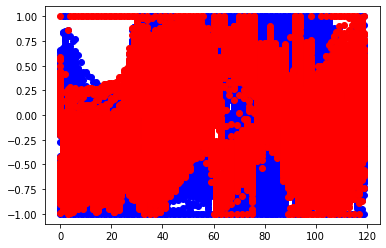

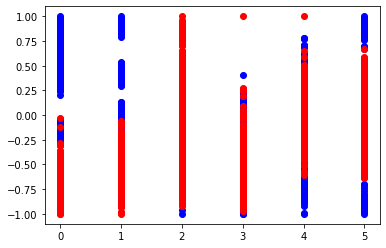

In [15]:
Y1 = np.array(range(0,120))
Y2 = np.array(range(0,6))

for case in range(0,850):
  if y_bin[0,case]==0:
    color_name = 'blue'
  else:
    color_name = 'red'
     # plt.title('case %d, label %d' % (case, y))
  plt.scatter(Y1,X1_train_maxabs[case,:], color = color_name)
plt.show()

for case in range(0,850):
  if y_bin[0,case]==0:
    color_name = 'blue'
  else:
    color_name = 'red'
     # plt.title('case %d, label %d' % (case, y))
  plt.scatter(Y2,X2_train_maxabs[case,:], color = color_name)
plt.show()
    # plt.ylabel('Force')
    # # plt.subplot(212)
    # # plt.plot(time,Ch2[:,case],time,Ch3[:,case],time,Ch4[:,case],time,Ch5[:,case])
    # # plt.xlabel('Time')
    # # plt.ylabel('Acceleration')

In [ ]:
Y1 = np.array(range(0,120))
Y2= np.array(range(0,6))
Y2

array([0, 1, 2, 3, 4, 5])

## Usando o Softmax Linear Model

In [ ]:
softmax_reg1 = LogisticRegression(random_state=0,max_iter= 1000)
softmax_reg2 = LogisticRegression(random_state=0,max_iter= 1000)
softmax_reg1.fit(X1_train_maxabs,y)
softmax_reg2.fit(X2_train_maxabs,y)

X_1 = softmax_reg1.predict(X1_train_maxabs)
Y_1 = softmax_reg1.predict_proba(X1_train_maxabs)
Z_1 = softmax_reg1.score(X1_train_maxabs,y)                           

X_2 = softmax_reg2.predict(X2_train_maxabs)
Y_2 = softmax_reg2.predict_proba(X2_train_maxabs)
Z_2 = softmax_reg2.score(X2_train_maxabs,y)  


## Analisando a acurácia do Método Linear

In [ ]:
print('Z_1', Z_1,'\n Z_2', Z_2)

Z_1 0.9988235294117647 
 Z_2 0.908235294117647


Analisando o score do modelo linear para o PCA e para o AR é possivel afirmar que o modelo que utiliza o PCA obteve resultado mais preciso (99,88%) comparado com o que utiliza o AR (90,82%). Isso já era esperado visto que o PCA reduziu bem mais a entrada do modelo comparado com o AR.

## A classe do Modelo

In [ ]:
print('X_1', X_1,'\n X_2', X_2)

## Probabilidade de pertencer a classe

In [ ]:
print('Y_1', Y_1,'\n Y_2', Y_2)

## SVM Model

In [ ]:
clf11 = svm.SVC(C=1.0, kernel='linear').fit(X1_train_maxabs,y)
clf12 = svm.SVC(C=1.0, kernel='poly').fit(X1_train_maxabs,y)
clf13 = svm.SVC(C=1.0, kernel='rbf').fit(X1_train_maxabs,y)
clf14 = svm.SVC(C=1.0, kernel='sigmoid').fit(X1_train_maxabs,y)

yh11 = clf11.predict(X1_train_maxabs)
yh12 = clf12.predict(X1_train_maxabs)
yh13 = clf13.predict(X1_train_maxabs)
yh14 = clf14.predict(X1_train_maxabs)

clf21 = svm.SVC(C=1.0, kernel='linear').fit(X2_train_maxabs,y)
clf22 = svm.SVC(C=1.0, kernel='poly').fit(X2_train_maxabs,y)
clf23 = svm.SVC(C=1.0, kernel='rbf').fit(X2_train_maxabs,y)
clf24 = svm.SVC(C=1.0, kernel='sigmoid').fit(X2_train_maxabs,y)

yh21 = clf21.predict(X2_train_maxabs)
yh22 = clf22.predict(X2_train_maxabs)
yh23 = clf23.predict(X2_train_maxabs)
yh24 = clf24.predict(X2_train_maxabs)


#print('yh11', yh11,'\n yh12', yh12, '\n yh13', yh13, '\n yh14', yh14, '\n yh21', yh21, '\n yh22', yh22, '\n yh23', yh23, '\n yh24', yh24)

## kNN Model

In [ ]:
clf31 = KNeighborsClassifier(n_neighbors=5).fit(X1_train_maxabs,y)
clf32 = KNeighborsClassifier(n_neighbors=10).fit(X1_train_maxabs,y)
clf33 = KNeighborsClassifier(n_neighbors=15).fit(X1_train_maxabs,y)
clf34 = KNeighborsClassifier(n_neighbors=20).fit(X1_train_maxabs,y)

yh31 = clf31.predict(X1_train_maxabs)
yh32 = clf32.predict(X1_train_maxabs)
yh33 = clf33.predict(X1_train_maxabs)
yh34 = clf34.predict(X1_train_maxabs)

clf41 = KNeighborsClassifier(n_neighbors=5).fit(X2_train_maxabs,y)
clf42 = KNeighborsClassifier(n_neighbors=10).fit(X2_train_maxabs,y)
clf43 = KNeighborsClassifier(n_neighbors=15).fit(X2_train_maxabs,y)
clf44 = KNeighborsClassifier(n_neighbors=20).fit(X2_train_maxabs,y)

yh41 = clf41.predict(X2_train_maxabs)
yh42 = clf42.predict(X2_train_maxabs)
yh43 = clf43.predict(X2_train_maxabs)
yh44 = clf44.predict(X2_train_maxabs)

#print('yh11', yh11,'\n yh12', yh12, '\n yh13', yh13, '\n yh14', yh14, '\n yh21', yh21, '\n yh22', yh22, '\n yh23', yh23, '\n yh24', yh24)

## Analisando o Modelo SVM:

In [ ]:
# AR
svm11 = clf11.score(X1_train_maxabs,y)
svm12 = clf12.score(X1_train_maxabs,y) 
svm13 = clf13.score(X1_train_maxabs,y) 
svm14 = clf14.score(X1_train_maxabs,y)

#PCA
svm21 = clf21.score(X2_train_maxabs,y)
svm22 = clf22.score(X2_train_maxabs,y) 
svm23 = clf23.score(X2_train_maxabs,y) 
svm24 = clf24.score(X2_train_maxabs,y) 

print('svm11', svm11, 'svm12', svm12, 'svm13', svm13, 'svm14', svm14)
print('\n svm21', svm21, 'svm22', svm22, 'svm23', svm23, 'svm24', svm24)

svm11 1.0 svm12 0.9988235294117647 svm13 0.9976470588235294 svm14 0.9847058823529412

 svm21 0.9364705882352942 svm22 0.9341176470588235 svm23 0.9364705882352942 svm24 0.8505882352941176


Para os resultados obtidos em que se variou o kernel do SVM para o AR, o que teve melhor acurácia foi o com kernel linear, obtendo o valor 100%. Já quando se variou o kernel do SVM para o PCA, tanto o kernel linear quanto o kernel rbf obtiveram os melhores resultados 93,64%. 

## Analisando o Modelo KNN:

In [ ]:
# AR
knn11 = clf31.score(X1_train_maxabs,y)
knn12 = clf32.score(X1_train_maxabs,y) 
knn13 = clf33.score(X1_train_maxabs,y) 
knn14 = clf34.score(X1_train_maxabs,y)

#PCA
knn21 = clf41.score(X2_train_maxabs,y)
knn22 = clf42.score(X2_train_maxabs,y) 
knn23 = clf43.score(X2_train_maxabs,y) 
knn24 = clf44.score(X2_train_maxabs,y)

print('knn11', knn11, 'knn12', knn12, 'knn13', knn13, 'knn14', knn14)
print('\n knn21', knn21, 'knn22', knn22, 'knn23', knn23, 'knn24', knn24)

knn11 0.9941176470588236 knn12 0.9894117647058823 knn13 0.9870588235294118 knn14 0.9870588235294118

 knn21 0.9376470588235294 knn22 0.9376470588235294 knn23 0.9294117647058824 knn24 0.9235294117647059


Para os resultados obtidos em que se variou o n_neighbors do KNN para o AR, o que teve melhor acurácia foi o com n_neighbors = 5, obtendo o valor de acurácia de 99,41%. Já quando se variou o n_neighbors para o PCA, tanto o de valor 5 quanto o de valor 10 obtiveram os melhores resultados 93,76%. 

## Comparação entre SVM, KNN e Softmax Linear Model

Entre os três modelos utilizados até o momento o que obteve melhor acurácia que os dados do AR foi o SVM linear (100%). Já para os dados do PCA foi o KNN com neighbors 5 e 10 (93,76%).

## Hyperparameter Search

Define Hyperparameter Distribution to Sample

In [ ]:
from scipy import stats

In [ ]:
# List of Hyperparameters to be Tested within the Hyperparameter Random Search
param_grids = []

param_grids.append( # LGR linear Regression
    [
     {
        "LGR__C": stats.loguniform(1e-2,1e2),
        #"LRG__penalty": ["none","l1","l2","elasticnet"],
        #"LRG__solver": ["newton-cg","lbfgs","liblinear","sag","saga"]
     }
    ]
)

param_grids.append( # SVC
    [
     {
         "SVC__C": stats.loguniform(1e-2,1e-1),
         "SVC__kernel": ["linear","poly","rbf","sigmoid"],
         "SVC__degree": stats.randint(2, 5),
         "SVC__gamma": stats.loguniform(1e-4, 1e0),
         #"SVC__epsilon": stats.loguniform(1e-4, 1e1),      
     }
    ]
)

param_grids.append( # KNN
    [
     {
          "KNN__n_neighbors": stats.randint(1, 21),
          "KNN__weights": ["uniform","distance"],
     }
    ]
)

param_grids.append(
    [
        {
            "DTR__criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
            "DTR__splitter": ["best","random"],
            "DTR__max_features": ['auto', 'sqrt', 'log2'],
             #  stats.uniform(),
        }
    ]

)


param_grids.append(
     [
         {
#             "RFR__n_estimators": stats.randint(2,100),
#             "RFR__max_depth": stats.randint(2,20),
             #"RFR__max_features": stats.uniform(),
              "RFR__max_features": ['auto', 'sqrt', 'log2'],
         }
     ]

)

Define Model Objects

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [ ]:
# Define Models
models = []
models.append(("LGR",LogisticRegression(max_iter=1000)))
models.append(("SVC",SVC()))
models.append(("KNN",KNeighborsClassifier()))

models.append(("DTR", DecisionTreeRegressor()))
models.append(("RFR", RandomForestRegressor()))

Perform Randomized Search with CV

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [ ]:
# Define the Model:
# k=0 -> LGR
# k=1 -> SVC
# k=2 -> KNN


for k in range(3):

  rkf = RepeatedKFold(n_splits=5, n_repeats=50)

  clf = Pipeline([("scaler", StandardScaler()), (models[k])])

  param_grid = param_grids[k]

  random_search = RandomizedSearchCV(clf, verbose=1, scoring="accuracy", 
      param_distributions=param_grid, n_iter=100, n_jobs=-1,cv=rkf, random_state=None)

  # AR

  X_train1, X_test1, y_train1, y_test1 = train_test_split(X1_train_maxabs, y, test_size=0.40, random_state=42)

  random_search.fit(X_train1, y_train1)

  yh_test1 = random_search.predict(X_test1)
  print('Best params',random_search.best_params_)

  acc1 = accuracy_score(y_test1, yh_test1)
  #acc=random_search.score(X_test1,y_test1) # Métrica Análoga

  print('Accuracy score for model',models[k][0],'e AR:',acc1)

  # print('k',k,'\n yh_test1', yh_test1)

  #PCA

  X_train2, X_test2, y_train2, y_test2 = train_test_split(X2_train_maxabs, y, test_size=0.40, random_state=42)

  random_search.fit(X_train2, y_train2)

  yh_test2 = random_search.predict(X_test2)
  print('Best params',random_search.best_params_)

  acc2 = accuracy_score(y_test2, yh_test2)
  #acc=random_search.score(X_test2,y_test2) # Métrica Análoga

  print('Accuracy score for model',models[k][0],'e PCA:',acc2)

  # print('k',k,'\n yh_test2', yh_test2)

(19/04) Para o modelo KNN e LGR, o AR obteve os melhores resultados segundo a métrica da utilizada, tendo a acurácia igual a 100%. Esse resultado foi melhor que os calculados anteriormente onde não se dividiu os dados entre treino e teste. Já para o PCA, o KNN foi o que apresentou pior resuldado da acurácia, tendo 89%.

In [ ]:
# Models
# k=3 -> DTR
# k=4 -> RFR


for k in range(3,5):

   rkf = RepeatedKFold(n_splits=5, n_repeats=5)

   clf = Pipeline([("scaler", StandardScaler()), (models[k])])

   param_grid = param_grids[k]

   random_search = RandomizedSearchCV(clf, verbose=1, scoring="accuracy", 
   param_distributions=param_grid, n_iter=100, n_jobs=-1,cv=rkf, random_state=None)

  # AR

   X_train1, X_test1, y_train1, y_test1 = train_test_split(X1_train_maxabs, y, test_size=0.40, random_state=42)

   random_search.fit(X_train1, y_train1)

   yh_test1 = random_search.predict(X_test1)
   print('Best params',random_search.best_params_)

   acc1 = sklearn.metrics.mean_squared_error(y_test1, yh_test1)
   #acc=random_search.score(X_test1,y_test1) # Métrica Análoga

   print('Accuracy score for model',models[k][0],'e AR:',acc1)

   # print('k',k,'\n yh_test1', yh_test1)

  #PCA

   X_train2, X_test2, y_train2, y_test2 = train_test_split(X2_train_maxabs, y, test_size=0.40, random_state=42)

   random_search.fit(X_train2, y_train2)

   yh_test2 = random_search.predict(X_test2)
   print('Best params',random_search.best_params_)

   acc2 = sklearn.metrics.mean_squared_error(y_test2, yh_test2)
   #acc=random_search.score(X_test2,y_test2) # Métrica Análoga

   print('Accuracy score for model',models[k][0],'e PCA:',acc2)

   # print('k',k,'\n yh_test2', yh_test2)

Fitting 25 folds for each of 24 candidates, totalling 600 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Best params {'DTR__splitter': 'random', 'DTR__max_features': 'auto', 'DTR__criterion': 'squared_error'}
Accuracy score for model DTR e AR: 0.16470588235294117
Fitting 25 folds for each of 24 candidates, totalling 600 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Best params {'DTR__splitter': 'best', 'DTR__max_features': 'auto', 'DTR__criterion': 'squared_error'}
Accuracy score for model DTR e PCA: 1.7558823529411764
Fitting 25 folds for each of 3 candidates, totalling 75 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 3 is smaller than n_iter=100. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  category=UserWarning,


Best params {'RFR__max_features': 'auto'}
Accuracy score for model RFR e AR: 0.1874158823529412
Fitting 25 folds for each of 3 candidates, totalling 75 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 3 is smaller than n_iter=100. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  category=UserWarning,


Best params {'RFR__max_features': 'auto'}
Accuracy score for model RFR e PCA: 0.8081894117647059


(26/04) Nessa nova métrica utilizada, quanto mais próximo de zero é o resultado, mais preciso ele foi. Nesse caso podemos destacar que para o AR, DTR foi maispreciso tendo o valor da métrica de apenas 0.16. Já para o PCA, RFR foi o mais preciso chegando a apenas 0.80. 

## PLOTTING CLUSTERING RESULTS - Kmeans ALGORITH

In [ ]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import pandas as pd
import plotly.express as px

In [ ]:
# AR
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1_train_maxabs, y, test_size=0.50, random_state=42)

kmeans_AR = KMeans(n_clusters=8, random_state=0).fit(X_train1)
kmeans_AR.labels_
yh_kmeans_AR = kmeans_AR.predict(X_test1)

list_of_tuples = list(zip(yh_kmeans_AR, X_test1))

df = pd.DataFrame(X_test1)
df['yh']=yh_kmeans_AR

#df = pd.DataFrame(list_of_tuples, columns = ['yh_kmeans_AR', 'X_test1'])

#fig1 = px.scatter_3d(df, x = X_test1[:,0], y = X_test1[:,1], z = X_test1[:,2], color='yh_kmeans_AR')
fig1 = px.scatter_3d(df, x = 0, y = 1, z = 2, color='yh')

fig1.show()

print('yh_means_AR', yh_kmeans_AR),


yh_means_AR [5 4 3 2 3 3 0 3 0 0 0 4 0 5 6 5 3 3 4 5 7 4 6 6 4 5 6 5 7 2 0 7 5 5 6 5 0
 0 1 3 5 3 3 6 0 7 2 5 0 0 3 3 0 5 1 2 5 4 4 2 3 4 0 5 5 7 4 5 3 6 3 0 3 2
 5 4 3 0 0 3 5 3 3 0 3 5 3 5 5 2 4 2 2 0 3 3 0 7 4 3 2 0 5 3 3 0 2 5 3 2 7
 3 4 2 3 3 1 4 4 3 5 5 3 3 5 0 3 6 2 6 3 0 5 7 5 0 3 3 2 1 4 3 3 5 3 5 5 4
 7 3 1 4 5 5 5 5 0 4 2 5 2 5 2 5 3 3 1 7 3 4 7 4 3 3 6 0 6 6 2 0 0 5 7 5 2
 5 0 0 4 3 3 4 5 7 4 0 7 4 3 4 6 5 3 2 5 5 7 0 6 2 5 4 7 4 3 1 2 5 4 2 5 5
 5 4 3 2 0 3 0 1 0 5 0 1 3 0 3 3 3 3 4 4 7 0 6 3 3 1 1 3 0 1 0 5 0 3 0 4 3
 1 3 5 5 3 2 0 5 3 6 6 7 4 3 5 0 0 3 5 3 4 3 0 5 0 3 7 0 4 3 4 0 5 3 4 2 4
 4 3 5 0 3 3 5 3 7 2 0 1 4 5 6 0 5 4 4 0 5 1 2 0 1 6 5 0 3 3 0 4 3 3 7 3 0
 3 2 0 0 5 5 3 3 0 3 3 7 1 0 5 2 2 1 2 5 1 2 2 2 3 2 7 5 3 3 4 3 4 4 4 6 0
 4 4 7 2 3 6 3 4 6 5 0 2 5 7 0 6 6 3 0 0 5 3 1 2 5 1 3 5 5 3 3 2 1 3 5 5 6
 3 0 3 3 2 3 6 3 5 4 0 4 5 3 3 2 3 6]


(None,)

In [ ]:
# PCA
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2_train_maxabs, y, test_size=0.50, random_state=42)

kmeans_PCA = KMeans(n_clusters=8, random_state=0).fit(X_train2)
kmeans_PCA.labels_
yh_kmeans_PCA = kmeans_PCA.predict(X_test2)

list_of_tuples = list(zip(yh_kmeans_AR, X_test2))

df = pd.DataFrame(X_test2)
df['yh']=yh_kmeans_AR

fig2 = px.scatter_3d(df, x = 0, y = 1, z = 2, color='yh')
#fig2 = px.scatter_3d(df, x = X_test2[:,0], y = X_test2[:,1], z = X_test2[:,2])
fig2.show()

print('yh_means_PCA', yh_kmeans_PCA),

yh_means_PCA [6 2 4 3 0 4 1 0 1 1 1 2 1 6 5 6 0 4 2 6 7 2 5 5 2 6 5 6 7 3 1 7 6 6 5 6 1
 1 4 0 6 4 4 5 1 7 3 6 1 1 0 0 1 6 4 3 6 2 2 3 4 2 1 6 6 7 2 6 0 5 4 1 4 3
 6 2 4 1 1 0 6 0 4 1 4 6 0 6 6 3 2 3 3 1 0 0 1 7 2 4 3 1 6 4 4 1 3 6 4 3 7
 0 2 3 0 0 4 2 2 0 6 6 0 4 3 1 0 5 3 5 4 1 6 7 6 1 4 0 3 4 2 4 0 6 0 6 6 2
 7 4 4 2 6 6 6 6 1 2 3 6 3 6 3 3 0 0 4 7 4 2 7 2 0 0 5 1 5 5 3 1 1 6 7 6 3
 6 1 1 2 4 4 2 6 7 2 1 7 2 4 2 5 6 4 3 6 6 7 1 5 3 6 2 7 2 4 4 3 6 2 3 6 6
 6 2 0 3 1 4 1 4 1 6 1 4 4 1 4 0 0 4 2 2 7 1 5 4 4 4 4 0 1 4 1 6 1 4 1 2 4
 4 0 6 6 4 3 1 6 4 5 5 7 2 4 6 1 1 0 6 4 2 4 1 6 1 4 7 1 2 4 2 1 6 0 2 3 2
 2 0 6 1 4 4 6 0 7 3 1 4 2 6 5 1 6 2 2 1 6 4 3 1 4 5 6 1 4 4 1 2 4 4 7 4 1
 4 3 1 1 6 6 4 0 1 0 0 7 4 1 6 3 3 4 3 6 4 3 3 3 0 3 7 6 0 0 2 0 2 2 2 5 1
 2 2 7 3 0 5 0 2 5 6 1 3 6 7 1 5 5 4 1 1 6 0 4 3 6 4 4 6 6 0 4 3 4 0 6 6 5
 4 1 4 4 3 0 5 0 6 2 1 2 6 4 0 3 4 5]


(None,)

## DATASET VISUALIZATION - t-SNE

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
# AR
#X_train1, X_test1, y_train1, y_test1 = train_test_split(X1_train_maxabs, y, test_size=0.50, random_state=42)

X_embedded = TSNE(n_components=3, learning_rate='auto', init='random').fit_transform(X1_train_maxabs)

#for case in range(0,425):
  
#  plt.scatter(X_train1[:,case], X_embedded[:,case])
#  plt.show()

#list_of_tuples = list(zip(y, X_embedded))

df = pd.DataFrame(X_embedded)
df['yh']=y

fig1 = px.scatter_3d(df, x = 0, y = 1, z = 2, color='yh')

fig1.show()

In [ ]:
# PCA
#X_train2, X_test2, y_train2, y_test2 = train_test_split(X2_train_maxabs, y, test_size=0.50, random_state=42)

X_embedded = TSNE(n_components=3, learning_rate='auto', init='random').fit_transform(X2_train_maxabs)

#for case in range(0,425):
  
#  plt.scatter(X_train1[:,case], X_embedded[:,case])
#  plt.show()

#list_of_tuples = list(zip(y_train2, X_embedded))

df = pd.DataFrame(X_embedded)
df['yh']=y

fig1 = px.scatter_3d(df, x = 0, y = 1, z = 2, color='yh')

fig1.show()

## ONE-CLASS CLASSIFICATION SVM

In [ ]:
# one-class svm for imbalanced binary classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1_train_maxabs, np.transpose(y_bin), test_size=0.50, random_state=42)

# define outlier detection model

model_AR = OneClassSVM(gamma='scale', nu=0.01)

# fit on majority class

trainX_AR = np.zeros((0,120))

trainX_AR = X_train1[np.argwhere(y_train1 == 0)[:,0]]

#trainX = X_train1[y_train1==0,:]
model_AR.fit(trainX_AR)

# detect outliers in the test set

yhat_AR = model_AR.predict(X_test1)

# mark inliers 1, outliers -1

y_test1[y_test1 == 1] = -1
y_test1[y_test1 == 0] = 1

# calculate score

score = f1_score(y_test1, yhat_AR, pos_label=-1)
print('F1 Score: %.3f' % score)


F1 Score: 0.947


In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2_train_maxabs, np.transpose(y_bin), test_size=0.50, random_state=42)

# define outlier detection model

model_PCA = OneClassSVM(gamma='scale', nu=0.01)

# fit on majority class

trainX_PCA = np.zeros((0,120))

trainX_PCA = X_train2[np.argwhere(y_train1 == 0)[:,0]]

#trainX = X_train1[y_train1==0,:]
model_PCA.fit(trainX_PCA)

# detect outliers in the test set

yhat_PCA = model_PCA.predict(X_test2)

# mark inliers 1, outliers -1

y_test2[y_test2 == 1] = -1
y_test2[y_test2 == 0] = 1

# calculate score

score = f1_score(y_test2, yhat_PCA, pos_label=-1)
print('F1 Score: %.3f' % score)


F1 Score: 0.959


(05/05) Observando os scores obtidos, é possivel afirmar que o modelo utilizando o PCA foi mais preciso do que o utilizando o AR.

## Training a neural network (Keras)

In [43]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [37]:
# define the keras model
model = Sequential()
model.add(Dense(120, input_dim=120, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [46]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1_train_maxabs, y, test_size=0.60, random_state=42)

# fit the keras model on the dataset
model.fit(X_train1, y_train1, epochs=150, batch_size=10)

Epoch 1/150
34/34 [==============================] - 1s 3ms/step - loss: -30.4414 - accuracy: 0.0588
Epoch 2/150
34/34 [==============================] - 0s 2ms/step - loss: -181.9778 - accuracy: 0.0588
Epoch 3/150
34/34 [==============================] - 0s 3ms/step - loss: -587.3757 - accuracy: 0.0588
Epoch 4/150
34/34 [==============================] - 0s 3ms/step - loss: -1470.8264 - accuracy: 0.0588
Epoch 5/150
34/34 [==============================] - 0s 3ms/step - loss: -3151.9006 - accuracy: 0.0588
Epoch 6/150
34/34 [==============================] - 0s 3ms/step - loss: -5958.5156 - accuracy: 0.0588
Epoch 7/150
34/34 [==============================] - 0s 3ms/step - loss: -10108.6904 - accuracy: 0.0588
Epoch 8/150
34/34 [==============================] - 0s 3ms/step - loss: -15861.5146 - accuracy: 0.0588
Epoch 9/150
34/34 [==============================] - 0s 4ms/step - loss: -23539.7930 - accuracy: 0.0588
Epoch 10/150
34/34 [==============================] - 0s 5ms/step - loss: 

In [59]:
# evaluate the keras model
_,acc = model.evaluate(X_train1, y_train1)
print('Accuracy: %.2f' % (acc*100))

11/11 [==============================] - 0s 3ms/step - loss: -68559448.0000 - accuracy: 0.0588
Accuracy: 5.88


A função evaluate() retornará uma lista com dois valores. A primeira será a perda do modelo no conjunto de dados e a segunda será a precisão do modelo no conjunto de dados. Estamos interessados ​​apenas em relatar a precisão, então vamos ignorar o valor da perda. A precisão ficou em torno de 0.06, ou seja, 6% Quanto mais próxima de 1.0 a acurácia se aproxima de 100%. Essa falta de precisão encontrada se deve ao fato de os hiperparametros escolhidos não gerarem um modelo preciso.